# Visualizing Earnings Based On College Majors

In this project we'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors). So cleaning the dataset is out of scope for this project.


Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

`Rank` - Rank by median earnings (the dataset is ordered by this column).<br>
`Major_code` - Major code.<br>
`Major` - Major description.<br>
`Major_category` - Category of major.<br>
`Total` - Total number of people with major.<br>
`Sample_size` - Sample size (unweighted) of full-time.<br>
`Men` - Male graduates.<br>
`Women` - Female graduates.<br>
`ShareWomen` - Women as share of total.<br>
`Employed` - Number employed.<br>
`Median` - Median salary of full-time, year-round workers.<br>
`Low_wage_jobs` - Number in low-wage service jobs.<br>
`Full_time` - Number employed 35 hours or more.<br>
`Part_time` - Number employed less than 35 hours.

### Import Libraries & Read the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv', index_col = 0)
recent_grads.iloc[[0]]


,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Rank,,,,,,,,,,,,,,,,,,,,
1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193


In [2]:
recent_grads.head()

,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Rank,,,,,,,,,,,,,,,,,,,,
1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
recent_grads.tail()

,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Rank,,,,,,,,,,,,,,,,,,,,
169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,593,237,410,87,0.104946,22000,20000,22000,288,338,192


In [4]:
recent_grads.describe()

,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [5]:
# drop null values from the dataframe 

raw_data_count = recent_grads.shape[0]
print(raw_data_count)
recent_grads.dropna(inplace = True)
cleaned_data_count = recent_grads.shape[0]
print(cleaned_data_count)

173
172



### Scatter Plots

Now we are going to explore the relations between the columns and try to find out answers for the questions.

##### Sample Size & Median

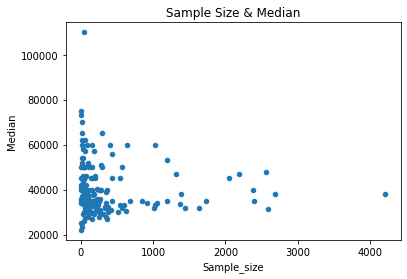

In [6]:
recent_grads.plot(x='Sample_size', y='Median', kind = 'scatter', title = 'Sample Size & Median')

##### Sample Size & Unemployment Rate

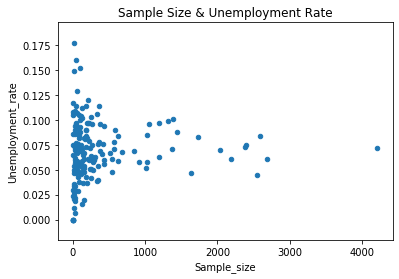

In [7]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind = 'scatter', title = 'Sample Size & Unemployment Rate')

##### Full Time & Median

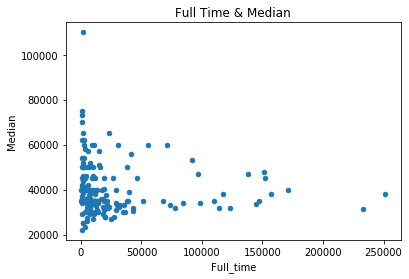

In [8]:
recent_grads.plot(x='Full_time', y='Median', kind = 'scatter', title = 'Full Time & Median')

##### Share Women & Median

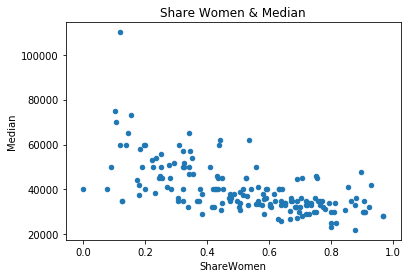

In [9]:
recent_grads.plot(x='ShareWomen', y='Median', kind = 'scatter', title = 'Share Women & Median')

##### Men & Median

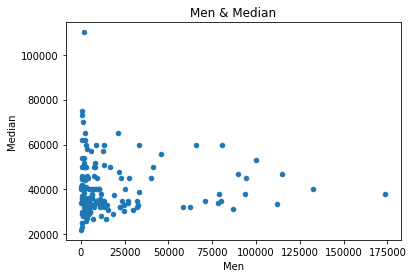

In [10]:
recent_grads.plot(x='Men', y='Median', kind = 'scatter', title = 'Men & Median')

##### Women & Median

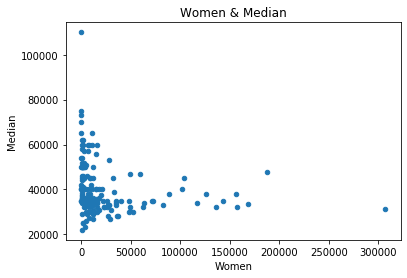

In [11]:
recent_grads.plot(x='Women', y='Median', kind = 'scatter', title = 'Women & Median')

Now we have the results of the scatter plots. The questions we were planning to answer are:

1. Do students in more popular majors make more money?

     - According to the *Sample Size & Median* plot, students in more popular majors do not make more money.
     
2. Do students that majored in subjects that were majority female make more money?

    - According to the *ShareWomen & Median* plot, students majored in subjects that were majority female, higher percentage than 50%, do not make more money in fact, as female majority increases median decreases.  
3. Is there any link between the number of full-time employess and median salary?

    - According to the *Full Time & Median* plot, there is no strong relation between the two columns however, it can be seen from the plot that higher the number of full-time employees lower the median salary.

### Histogram Plots

Now we can plot histograms for columns and see the distribution of values in each column.


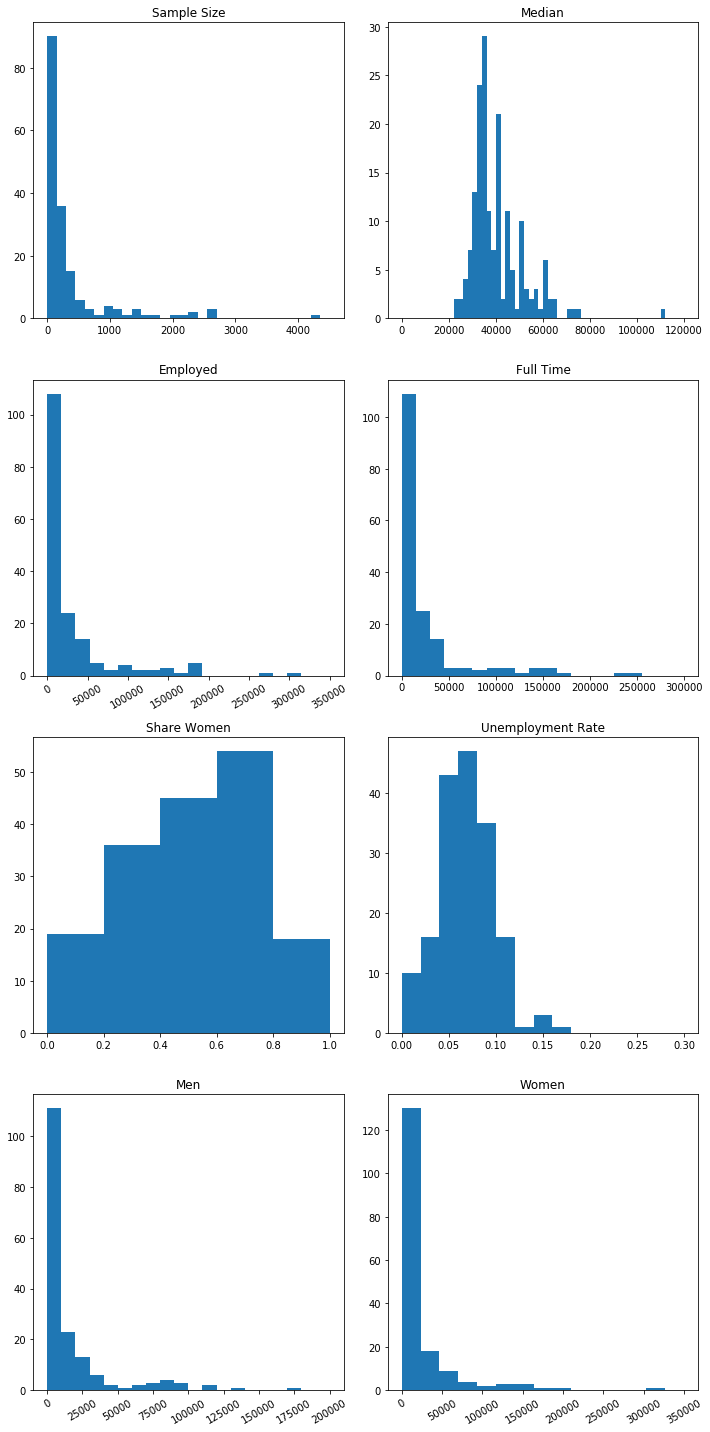

In [12]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize=(10,20))
ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7 = axes.flatten()

# Sample Size
ax0.hist(recent_grads['Sample_size'], bins=30, range=(0, 4500))
ax0.set_title('Sample Size')

# Median
ax1.hist(recent_grads['Median'], bins=60, range=(0, 120000))
ax1.set_title('Median')

# Employed
ax2.hist(recent_grads['Employed'], bins=20, range=(0, 350000))
for tick in ax2.get_xticklabels():
    tick.set_rotation(30)
ax2.set_title('Employed')

# Full Time
ax3.hist(recent_grads['Full_time'], bins=20, range=(0, 300000))
ax3.set_title('Full Time')

# Share Women
ax4.hist(recent_grads['ShareWomen'], bins=5, range=(0, 1))
ax4.set_title('Share Women')

# Unemployment Rate
ax5.hist(recent_grads['Unemployment_rate'], bins=15, range=(0, 0.3))
ax5.set_title('Unemployment Rate')

# Men
ax6.hist(recent_grads['Men'], bins=20, range=(0, 200000))
for tick in ax6.get_xticklabels():
    tick.set_rotation(30)
ax6.set_title('Men')


# Women
ax7.hist(recent_grads['Women'], bins=15, range=(0, 350000))
for tick in ax7.get_xticklabels():
    tick.set_rotation(30)
ax7.set_title('Women')


fig.tight_layout()
plt.show()





### Scatter Matrices

We can generate scatter matrix to show both histograms and the relation between two columns in the same grid.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000280E18DBB88>,
      dtype=object)

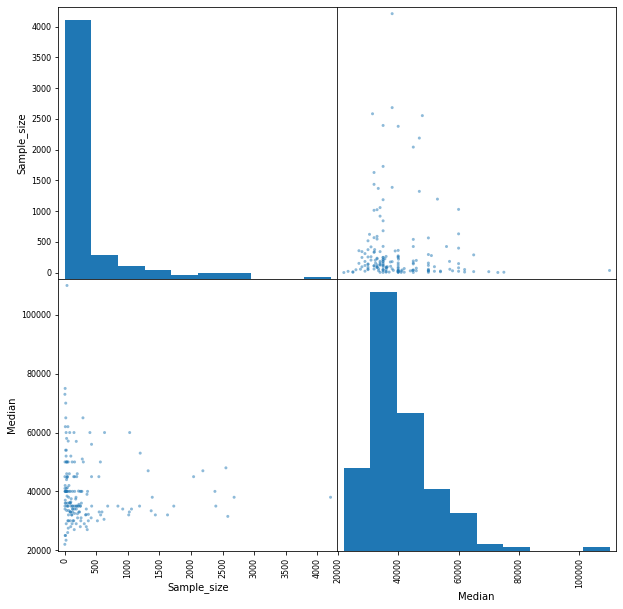

In [13]:
# import plotting library
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000280E1DF4E08>,
      dtype=object)

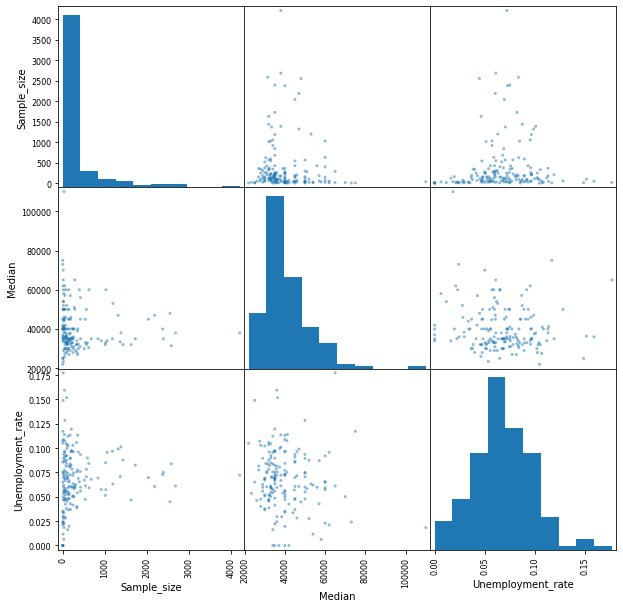

In [14]:
scatter_matrix(recent_grads[['Sample_size', 'Median','Unemployment_rate']], figsize=(10,10))

### Bar Plots

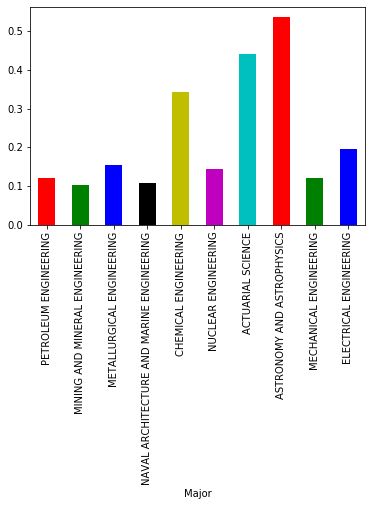

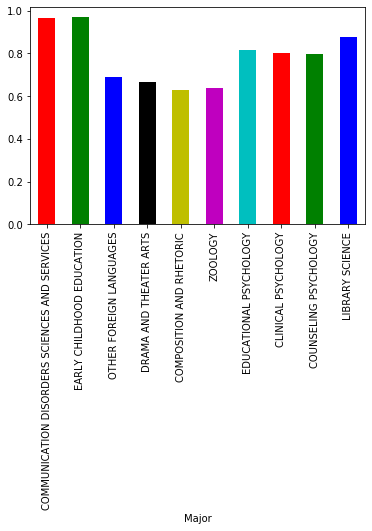

In [15]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', color=list('rgbkymc'), legend=False)
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen', color=list('rgbkymc'), legend=False)

Observations:
    - Share of women in STEM majors are lesser than the non-STEM majors.

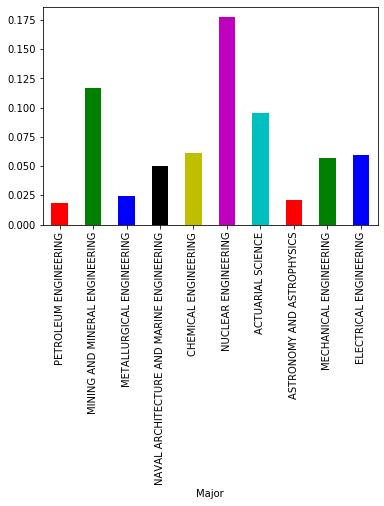

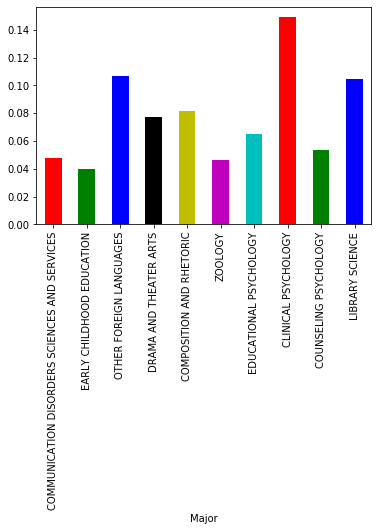

In [16]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', color=list('rgbkymc'), legend=False)
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate', color=list('rgbkymc'), legend=False)

Observations:
    - Nuclear Engineering majors along with the Clinical Psychology majors have the most unemployment rate.

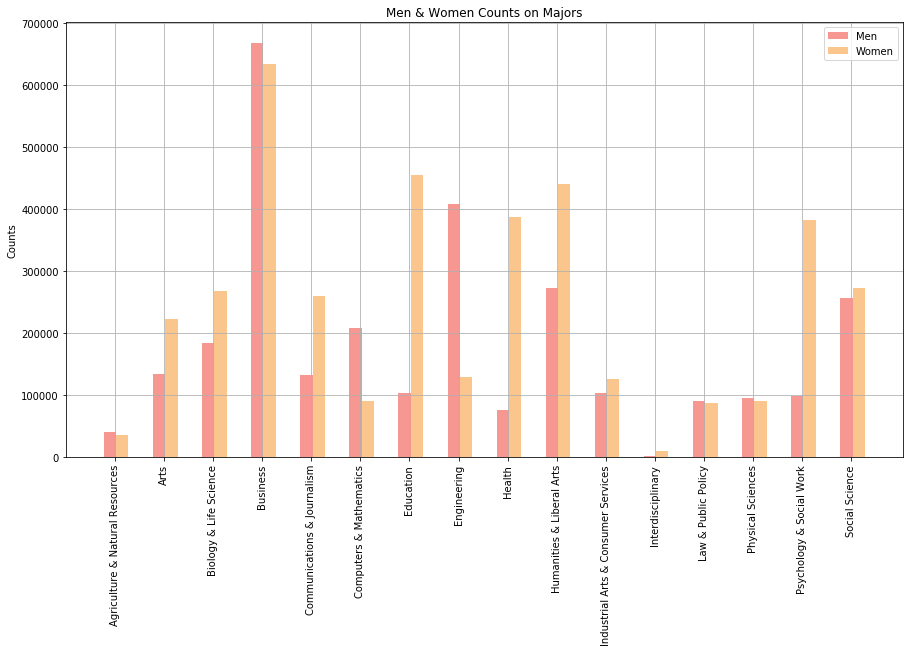

In [156]:
# Setting the positions and width for the bars
pos = list(range(len(recent_grads['Major_category'].unique()))) 

width = 0.25 
    
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(15,8))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        recent_grads.groupby('Major_category').sum()['Men'].sort_index(), 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224')

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        recent_grads.groupby('Major_category').sum()['Women'].sort_index(),
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E')
           
# Set the y axis label
ax.set_ylabel('Counts')

# Set the chart's title
ax.set_title('Men & Women Counts on Majors')

# Set the position of the x ticks
ax.set_xticks([p + 0.1 for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(recent_grads['Major_category'].sort_values().unique(), rotation=90)

# Adding the legend and showing the plot
plt.legend(['Men', 'Women'], loc='upper right')
plt.grid()
plt.show()

### Box Plots

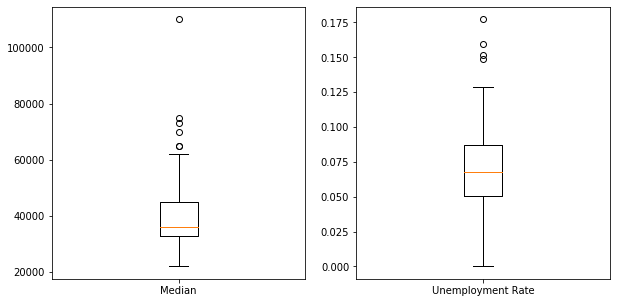

In [19]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))
ax0, ax1 = axes.flatten()

ax0.boxplot(recent_grads['Median'].values)
ax0.set_xticklabels(['Median'])

ax1.boxplot(recent_grads['Unemployment_rate'].values)
ax1.set_xticklabels(['Unemployment Rate'])


plt.show()

Observations:
* Median value of the Median column is almost around 40,000. There are some outliers reaching up to more than 100,000. The lowest Median Value is around 20,000.
* Unemployment Rates also have outliers ranging from 0.15 to more than 0.175. Median is around 0.075 for the Unemployment Rate.


### Hexagonal Bin Plots

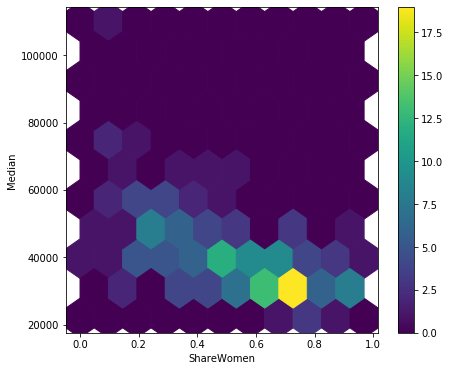

In [40]:
ax = recent_grads.plot.hexbin(x='ShareWomen', y='Median',gridsize = 10, cmap='viridis', sharex=False, figsize=(7,6))

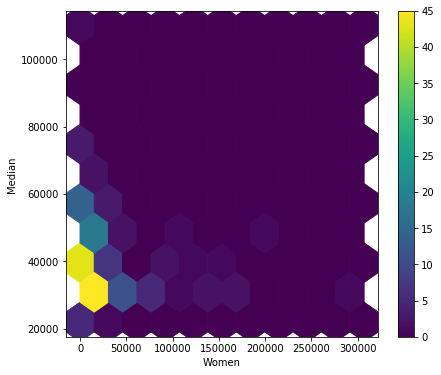

In [41]:
ax = recent_grads.plot.hexbin(x='Women', y='Median',gridsize = 10, cmap='viridis', sharex=False, figsize=(7,6))

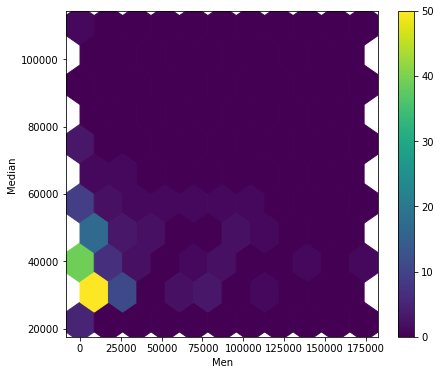

In [42]:
ax = recent_grads.plot.hexbin(x='Men', y='Median',gridsize = 10, cmap='viridis', sharex=False, figsize=(7,6))

We can have a better looking scatter plots using hexagonal bin plots.

## Conclusions:

   * We have generated many plots to explore the College Majors dataset.
   * According to these plots we can deduce that Women tend to study in non-STEM areas whilst Men tend to study in STEM areas.
   * The majors which are female dominant tend to have higher unemployment rates than the majors with male dominance.
   
We can easily make these deductions once we generate proper visualization for them.